In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split 
import time
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA

from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import pickle
import matplotlib.pyplot as plt




# Function to apply PCA
def apply_pca(indep_X, n_components=5):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(indep_X)
    explained_variance = pca.explained_variance_ratio_
    print(f"Explained Variance by PCA: {explained_variance}")
    return X_pca


def split_scalar(indep_X,dep_Y):
        X_train, X_test, y_train, y_test = train_test_split(indep_X, dep_Y, test_size = 0.25, random_state = 0)
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)    
        return X_train, X_test, y_train, y_test
    
 
def cm_prediction(classifier,X_test):
         y_pred = classifier.predict(X_test)
            
            # Making the Confusion Matrix
         from sklearn.metrics import confusion_matrix
         cm = confusion_matrix(y_test, y_pred)
            
         from sklearn.metrics import accuracy_score 
         from sklearn.metrics import classification_report 
            #from sklearn.metrics import confusion_matrix
            #cm = confusion_matrix(y_test, y_pred)
            
         Accuracy=accuracy_score(y_test, y_pred )
            
         report=classification_report(y_test, y_pred)
         return  classifier,Accuracy,report,X_test,y_test,cm

def logistic(X_train,y_train,X_test):       
        # Fitting K-NN to the Training set
        from sklearn.linear_model import LogisticRegression
        classifier = LogisticRegression(random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm      
    
def svm_linear(X_train,y_train,X_test):
            from sklearn.svm import SVC
            classifier = SVC(kernel = 'linear', random_state = 0)
            classifier.fit(X_train, y_train)
            classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
            return  classifier,Accuracy,report,X_test,y_test,cm
    
def svm_NL(X_train,y_train,X_test):
        from sklearn.svm import SVC
        classifier = SVC(kernel = 'rbf', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm
   
def Navie(X_train,y_train,X_test):       
        # Fitting K-NN to the Training set
        from sklearn.naive_bayes import GaussianNB
        classifier = GaussianNB()
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm         
    
    
def knn(X_train,y_train,X_test):
           
        # Fitting K-NN to the Training set
        from sklearn.neighbors import KNeighborsClassifier
        classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm

def Decision(X_train,y_train,X_test):
        
        # Fitting K-NN to the Training set
        from sklearn.tree import DecisionTreeClassifier
        classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm      


def random(X_train,y_train,X_test):
        
        # Fitting K-NN to the Training set
        from sklearn.ensemble import RandomForestClassifier
        classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm
    
def principalAnalysis(acclog,accsvml,accsvmnl,accknn,accnav,accdes,accrf): 
    
    dataframe=pd.DataFrame(index=['ChiSquare'],columns=['Logistic','SVMl','SVMnl','KNN','Navie','Decision','Random'])
    for number,idex in enumerate(dataframe.index):      
        dataframe['Logistic'][idex]=acclog[number]       
        dataframe['SVMl'][idex]=accsvml[number]
        dataframe['SVMnl'][idex]=accsvmnl[number]
        dataframe['KNN'][idex]=accknn[number]
        dataframe['Navie'][idex]=accnav[number]
        dataframe['Decision'][idex]=accdes[number]
        dataframe['Random'][idex]=accrf[number]
    return dataframe

In [21]:

dataset1 = pd.read_csv("PreProcessedEmployee.csv", index_col=None)
dataset1
df2 = dataset1
df2 = pd.get_dummies(df2, drop_first=True)


# Convert all boolean columns to 0 and 1, except 'Resigned'
for col in df2.select_dtypes(include=['bool']).columns:
    if col != 'Resigned':  # Keep 'Resigned' as is
        df2[col] = df2[col].astype(int)
df2
indep_X = df2.drop(['Performance_Score','Work_Hours_Per_Week','Projects_Handled','Resigned','Department_Engineering',	'Department_Finance','Gender_Other','Job_Title_Consultant',	'Job_Title_Developer',	'Job_Title_Engineer',	'Job_Title_Manager'	,'Job_Title_Specialist'	,'Job_Title_Technician',	'Education_Level_Master',	'Education_Level_PhD'] ,axis=1)  # Features
dep_Y = df2['Performance_Score']  # Target



# Split the dataset
X_train, X_test, y_train, y_test = split_scalar(pca_data, dep_Y)


In [11]:
print(df2.columns)

Index(['Age', 'Years_At_Company', 'Performance_Score', 'Monthly_Salary',
       'Work_Hours_Per_Week', 'Projects_Handled', 'Promotions', 'Resigned',
       'Department_Engineering', 'Department_Finance', 'Department_HR',
       'Department_IT', 'Department_Legal', 'Department_Marketing',
       'Department_Operations', 'Department_Sales', 'Gender_Male',
       'Gender_Other', 'Job_Title_Consultant', 'Job_Title_Developer',
       'Job_Title_Engineer', 'Job_Title_Manager', 'Job_Title_Specialist',
       'Job_Title_Technician', 'Education_Level_High School',
       'Education_Level_Master', 'Education_Level_PhD'],
      dtype='object')


In [12]:
print(df2.columns)

Index(['Age', 'Years_At_Company', 'Performance_Score', 'Monthly_Salary',
       'Work_Hours_Per_Week', 'Projects_Handled', 'Promotions', 'Resigned',
       'Department_Engineering', 'Department_Finance', 'Department_HR',
       'Department_IT', 'Department_Legal', 'Department_Marketing',
       'Department_Operations', 'Department_Sales', 'Gender_Male',
       'Gender_Other', 'Job_Title_Consultant', 'Job_Title_Developer',
       'Job_Title_Engineer', 'Job_Title_Manager', 'Job_Title_Specialist',
       'Job_Title_Technician', 'Education_Level_High School',
       'Education_Level_Master', 'Education_Level_PhD'],
      dtype='object')


In [28]:
# Apply PCA to the dataset
pca_data = apply_pca(indep_X, n_components=5)


acclog=[]
accsvml=[]
accsvmnl=[]
accknn=[]
accnav=[]
accdes=[]
accrf=[]


Explained Variance by PCA: [9.99930838e-01 6.40627138e-05 4.22273803e-06 3.51998439e-07
 1.32000021e-07]


In [29]:
pca_data 

array([[ 4.42168655e+02,  1.47781262e+01, -2.88319073e+00,
        -1.05261680e+00,  4.79340601e-01],
       [ 1.19216907e+03, -1.12556367e+01, -4.24159860e+00,
         8.66298398e-01,  3.48402354e-01],
       [-4.57831683e+02,  1.49142660e+01,  3.07199662e+00,
        -8.93703132e-01,  5.02854261e-01],
       ...,
       [-1.40783136e+03, -1.61041201e+01,  2.77511357e+00,
        -8.73383245e-01, -3.82453522e-01],
       [-1.50783128e+03,  2.79047407e+00, -1.72789364e+00,
         3.28011108e-02, -4.95222151e-01],
       [ 8.42168881e+02, -8.21089632e+00, -2.28025145e+00,
        -1.10475896e+00,  4.26643367e-01]])

In [30]:
   
X_train, X_test, y_train, y_test = split_scalar(pca_data, dep_Y)   
        
classifier,Accuracy,report,X_test,y_test,cm=logistic(X_train,y_train,X_test)
acclog.append(Accuracy)

classifier,Accuracy,report,X_test,y_test,cm=svm_linear(X_train,y_train,X_test)  
accsvml.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=svm_NL(X_train,y_train,X_test)  
accsvmnl.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=knn(X_train,y_train,X_test)  
accknn.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=Navie(X_train,y_train,X_test)  
accnav.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=Decision(X_train,y_train,X_test)  
accdes.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=random(X_train,y_train,X_test)  
accrf.append(Accuracy)
    
result=principalAnalysis(acclog,accsvml,accsvmnl,accknn,accnav,accdes,accrf)


C:\Users\sindhiya maria\anaconda3\envs\Aiml\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sindhiya maria\anaconda3\envs\Aiml\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sindhiya maria\anaconda3\envs\Aiml\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [16]:
result
#1

,Logistic,SVMl,SVMnl,KNN,Navie,Decision,Random
ChiSquare,0.333333,0.333333,0.412698,0.761905,0.333333,0.777778,0.777778


In [20]:
result
#3

,Logistic,SVMl,SVMnl,KNN,Navie,Decision,Random
ChiSquare,0.269841,0.285714,0.301587,0.222222,0.285714,0.746032,0.349206


In [27]:
result
#4

,Logistic,SVMl,SVMnl,KNN,Navie,Decision,Random
ChiSquare,0.238095,0.285714,0.269841,0.238095,0.285714,0.650794,0.587302


In [31]:
result
#5

,Logistic,SVMl,SVMnl,KNN,Navie,Decision,Random
ChiSquare,0.222222,0.285714,0.301587,0.253968,0.253968,0.698413,0.380952


🔹 Explained Variance by PCA Components: [0.14466768 0.11477686]


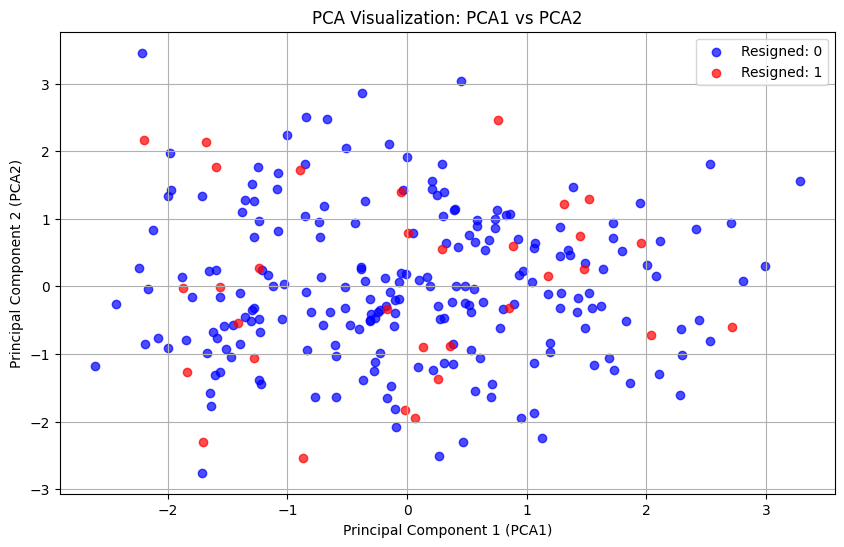

In [64]:
#  Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

#  Load dataset
dataset = pd.read_csv('PreProcessedEmployee.csv')

#  Identify Categorical Columns (Non-Numeric)
categorical_columns = ['Department', 'Gender', 'Job_Title', 'Education_Level']

#  Convert Categorical Columns to Numeric (Using Label Encoding)
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])  # Encode categorical columns
    label_encoders[col] = le  # Store encoder for future reference

#  Select Features (Exclude 'Resigned' Column)
X = dataset.iloc[:, :-1].values  # All columns except the last one (Target Variable)
y = dataset.iloc[:, -1].values   # Target Variable (Resigned: 0 or 1)

#  Standardize Features (Essential for PCA)
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

#  Apply PCA (Reducing to 2 Components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#  Explained Variance of PCA
explained_variance = pca.explained_variance_ratio_
print("🔹 Explained Variance by PCA Components:", explained_variance)

#  Create a DataFrame with PCA1, PCA2, and Target Variable
pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
pca_df['Resigned'] = y  # Add the target variable

#  Visualizing PCA1 vs PCA2
plt.figure(figsize=(10, 6))
colors = {0: 'blue', 1: 'red'}  # Not Resigned (Blue) | Resigned (Red)

# Scatter plot for PCA Components
for resign_status in [0, 1]:
    subset = pca_df[pca_df['Resigned'] == resign_status]
    plt.scatter(subset['PCA1'], subset['PCA2'], c=colors[resign_status], label=f'Resigned: {resign_status}', alpha=0.7)

#  Plot Settings
plt.title('PCA Visualization: PCA1 vs PCA2')
plt.xlabel('Principal Component 1 (PCA1)')
plt.ylabel('Principal Component 2 (PCA2)')
plt.legend()
plt.grid(True)
plt.show()


 Confusion Matrix:
 [[46  0]
 [ 4  0]]
 Explained Variance by PCA Components: [0.14466768 0.11477686]


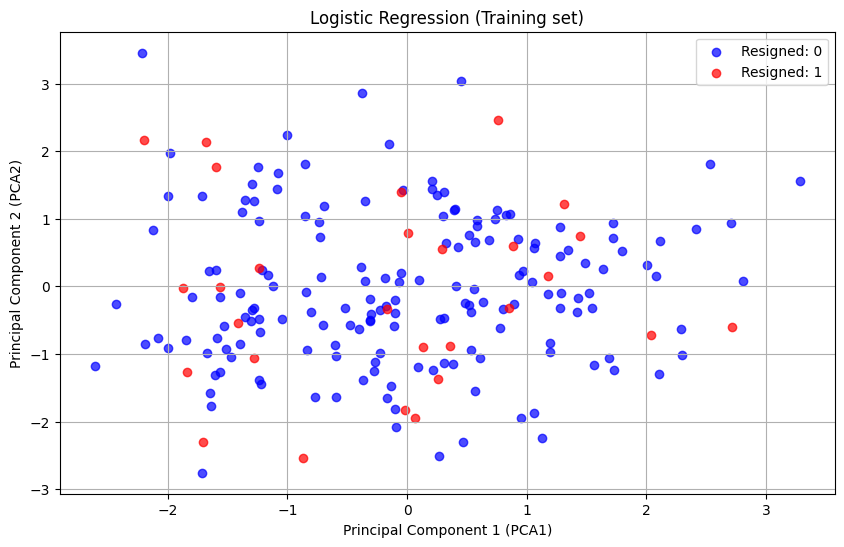

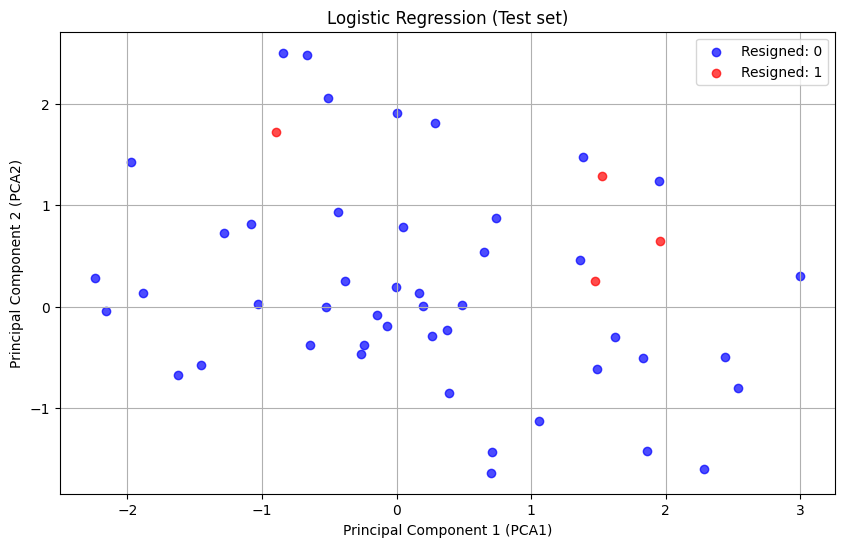

In [68]:
#  Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

#  Load dataset
dataset = pd.read_csv('PreProcessedEmployee.csv')

#  Identify Categorical Columns
categorical_columns = ['Department', 'Gender', 'Job_Title', 'Education_Level']

#  Convert Categorical Columns to Numeric (Label Encoding)
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])  # Encode categorical data
    label_encoders[col] = le  # Store encoder for reference

#  Select Features (Exclude 'Resigned' Column)
X = dataset.iloc[:, :-1].values  # All columns except the last one (Target Variable)
y = dataset.iloc[:, -1].values   # Target Variable (Resigned: 0 or 1)

#  Feature Scaling
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

#  Apply PCA (Reducing to 2 Components for Visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#  Split into Training and Test Set
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=0)

#  Train Logistic Regression Model
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

#  Predict on Test Data
y_pred = classifier.predict(X_test)

#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(" Confusion Matrix:\n", cm)

#  Explained Variance of PCA Components
explained_variance = pca.explained_variance_ratio_
print(" Explained Variance by PCA Components:", explained_variance)

#  Create a DataFrame with PCA1, PCA2, and Target Variable
pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
pca_df['Resigned'] = y  # Add the target variable

#  Visualization Function
def plot_pca_results(X_set, y_set, title):
    plt.figure(figsize=(10, 6))
    colors = {0: 'blue', 1: 'red'}  # Not Resigned (Blue) | Resigned (Red)

    for resign_status in [0, 1]:
        subset = pd.DataFrame(X_set)[y_set == resign_status]
        plt.scatter(subset[0], subset[1], c=colors[resign_status], label=f'Resigned: {resign_status}', alpha=0.7)

    plt.title(title)
    plt.xlabel('Principal Component 1 (PCA1)')
    plt.ylabel('Principal Component 2 (PCA2)')
    plt.legend()
    plt.grid(True)
    plt.show()

#  Plot Training Set Results
plot_pca_results(X_train, y_train, 'Logistic Regression (Training set)')

#  Plot Test Set Results
plot_pca_results(X_test, y_test, 'Logistic Regression (Test set)')


 Confusion Matrix:
 [[0 0 3 0 2 0]
 [0 0 1 1 3 0]
 [2 0 4 2 3 0]
 [1 0 1 2 3 0]
 [1 0 1 2 4 2]
 [0 0 4 1 6 1]]
🔹 Explained Variance by PCA Components: [0.11836602 0.11254557 0.1071135  0.10465323 0.09487676]


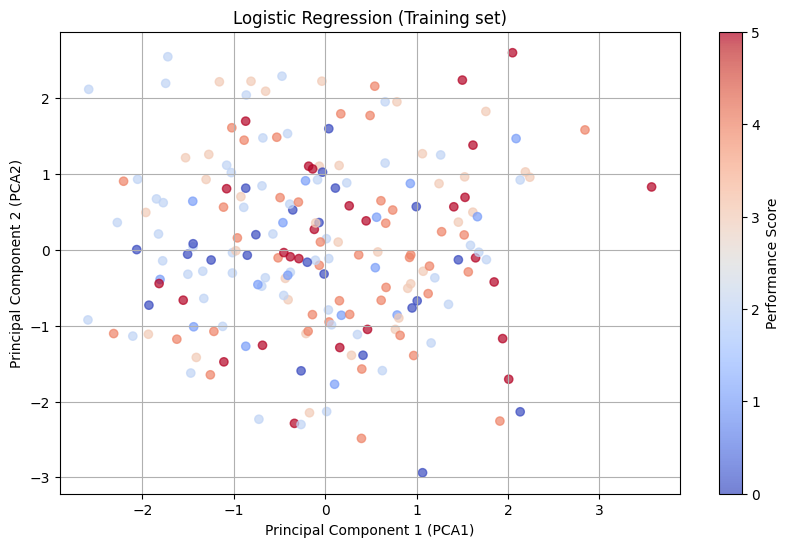

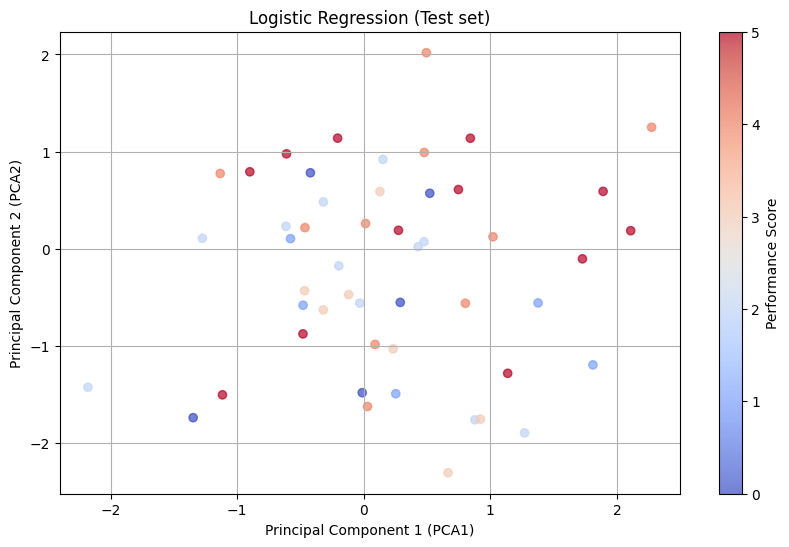

In [74]:
#  Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

#  Load dataset
dataset = pd.read_csv('PreProcessedEmployee.csv')

#  Identify Categorical Columns
categorical_columns = ['Department', 'Gender', 'Job_Title', 'Education_Level']

#  Convert Categorical Columns to Numeric (Label Encoding)
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])  # Encode categorical data
    label_encoders[col] = le  # Store encoder for reference

#  Select Features (Exclude 'Performance_Score' Column from X)
X = dataset.drop(columns=['Performance_Score']).values  # Features (excluding target)
y = dataset['Performance_Score'].values  # Target Variable (Performance Score)

#  Feature Scaling
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

#  Apply PCA (Reducing to 2 Components for Visualization)
pca = PCA(n_components=5)  # Reduce to 2 dimensions
X_pca = pca.fit_transform(X_scaled)

#  Split into Training and Test Set
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=0)

#  Train Logistic Regression Model
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

#  Predict on Test Data
y_pred = classifier.predict(X_test)

#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(" Confusion Matrix:\n", cm)

#  Explained Variance of PCA Components
explained_variance = pca.explained_variance_ratio_
print("🔹 Explained Variance by PCA Components:", explained_variance)

#  Create a DataFrame with PCA1, PCA2, and Performance_Score
#['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5'])
pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2','PCA3', 'PCA4', 'PCA5'])
pca_df['Performance_Score'] = y  # Add the performance score

#  Visualization Function
def plot_pca_results(X_set, y_set, title):
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, cmap='coolwarm', alpha=0.7)
    plt.colorbar(scatter, label="Performance Score")
    plt.title(title)
    plt.xlabel('Principal Component 1 (PCA1)')
    plt.ylabel('Principal Component 2 (PCA2)')
    plt.grid(True)
    plt.show()

#  Plot Training Set Results
plot_pca_results(X_train, y_train, 'Logistic Regression (Training set)')

#  Plot Test Set Results
plot_pca_results(X_test, y_test, 'Logistic Regression (Test set)')


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

# Load dataset
dataset = pd.read_csv('PreProcessedEmployee.csv')

# Debugging: Check dataset structure
print("Dataset shape:", dataset.shape)
print("Dataset columns:", dataset.columns)
print(dataset.head())  # Display first few rows

# Identify categorical & numerical columns
categorical_columns = ['Department', 'Gender', 'Job_Title', 'Education_Level']
numerical_columns = [col for col in dataset.columns if col not in categorical_columns + ['Resigned']]

# Separate Features (X) and Target (y)
X = dataset[numerical_columns + categorical_columns].copy()  # Keep all features
y = dataset['Resigned'].astype(int)  # Convert target to numeric (if it's not already)

# Debugging: Print unique values in categorical columns
for col in categorical_columns:
    print(f"Unique values in '{col}': {dataset[col].unique()}")

# Convert categorical features using OneHotEncoder & LabelEncoder
column_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Scale numerical columns
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)  # One-hot encode categorical columns
    ])

# Transform X
X = column_transformer.fit_transform(X)

# Debugging: Check transformed X shape
print("Transformed Features shape:", X.shape)

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Applying PCA (reduce dimensions to 2)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Explained Variance
explained_variance = pca.explained_variance_ratio_
print("Explained Variance by PCA Components:", explained_variance)

# Train Logistic Regression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train_pca, y_train)

# Predict on Test Set
y_pred = classifier.predict(X_test_pca)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Dataset shape: (249, 12)
Dataset columns: Index(['Age', 'Years_At_Company', 'Performance_Score', 'Monthly_Salary',
       'Work_Hours_Per_Week', 'Projects_Handled', 'Promotions', 'Department',
       'Gender', 'Job_Title', 'Education_Level', 'Resigned'],
      dtype='object')
   Age  Years_At_Company  Performance_Score  Monthly_Salary  \
0   55                 2                5.0            6750   
1   29                 0                5.0            7500   
2   55                 8                3.0            5850   
3   48                 7                2.0            4800   
4   36                 3                2.0            4800   

   Work_Hours_Per_Week  Projects_Handled  Promotions        Department  \
0                   33                32           0                IT   
1                   34                34           2           Finance   
2                   37                27           0           Finance   
3                   52                10        

In [47]:
! pip install imbalanced-learn


   ---------------------------------------- 0.0/238.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/238.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/238.4 kB ? eta -:--:--
   ----- ---------------------------------- 30.7/238.4 kB 1.3 MB/s eta 0:00:01
   ----- ---------------------------------- 30.7/238.4 kB 1.3 MB/s eta 0:00:01
   ----- ---------------------------------- 30.7/238.4 kB 1.3 MB/s eta 0:00:01
   ----- ---------------------------------- 30.7/238.4 kB 1.3 MB/s eta 0:00:01
   --------------- ----------------------- 92.2/238.4 kB 374.1 kB/s eta 0:00:01
   ----------------- -------------------- 112.6/238.4 kB 385.0 kB/s eta 0:00:01
   ------------------------ ------------- 153.6/238.4 kB 510.2 kB/s eta 0:00:01
   ------------------------ ------------- 153.6/238.4 kB 510.2 kB/s eta 0:00:01
   ------------------------ ------------- 153.6/238.4 kB 510.2 kB/s eta 0:00:01
   -------------------------------- ----- 204.8/238.4 kB 461.0 kB/s eta

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Load dataset
dataset = pd.read_csv('PreProcessedEmployee.csv')

# Debugging: Check class distribution
print("Target Class Distribution:\n", dataset["Resigned"].value_counts())

# Identify categorical & numerical columns
categorical_columns = ['Department', 'Gender', 'Job_Title', 'Education_Level']
numerical_columns = [col for col in dataset.columns if col not in categorical_columns + ['Resigned']]

# Separate Features (X) and Target (y)
X = dataset[numerical_columns + categorical_columns].copy()
y = dataset['Resigned'].astype(int)  # Convert target to numeric (if it's not already)

# Debugging: Print unique values in categorical columns
for col in categorical_columns:
    print(f"Unique values in '{col}': {dataset[col].unique()}")

# Convert categorical features using OneHotEncoder
column_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Scale numerical columns
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)  # One-hot encode categorical columns
    ])

X = column_transformer.fit_transform(X)

# Debugging: Check transformed feature shape
print("Transformed Features shape:", X.shape)

# **Balance dataset using SMOTE**
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Debug: Check new class distribution
print("Balanced Class Distribution:\n", pd.Series(y_balanced).value_counts())

# Split balanced data into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=0)

# Train Logistic Regression Model (WITHOUT PCA)
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

# Predict test set results
y_pred = classifier.predict(X_test)

# Confusion Matrix & Classification Report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))


Target Class Distribution:
 Resigned
False    217
True      32
Name: count, dtype: int64
Unique values in 'Department': ['IT' 'Finance' 'Customer Support' 'Engineering' 'Marketing' 'HR'
 'Operations' 'Sales' 'Legal']
Unique values in 'Gender': ['Male' 'Female' 'Other']
Unique values in 'Job_Title': ['Specialist' 'Developer' 'Analyst' 'Manager' 'Technician' 'Engineer'
 'Consultant']
Unique values in 'Education_Level': ['High School' 'Bachelor' 'Master' 'PhD']
Transformed Features shape: (249, 30)
Balanced Class Distribution:
 Resigned
0    217
1    217
Name: count, dtype: int64
Confusion Matrix:
 [[26 17]
 [16 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.60      0.61        43
           1       0.62      0.64      0.63        44

    accuracy                           0.62        87
   macro avg       0.62      0.62      0.62        87
weighted avg       0.62      0.62      0.62        87



In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Load dataset
dataset = pd.read_csv('PreProcessedEmployee.csv')

# Debugging: Check class distribution
print("Target Class Distribution:\n", dataset["Resigned"].value_counts())

# Identify categorical & numerical columns
categorical_columns = ['Department', 'Gender', 'Job_Title', 'Education_Level']
numerical_columns = [col for col in dataset.columns if col not in categorical_columns + ['Resigned']]

# Separate Features (X) and Target (y)
X = dataset[numerical_columns + categorical_columns].copy()
y = dataset['Resigned'].astype(int)  # Convert target to numeric

# Convert categorical features using OneHotEncoder
column_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Scale numerical columns
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)  # One-hot encode categorical columns
    ])

X = column_transformer.fit_transform(X)

# **Balance dataset using SMOTE**
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Debug: Check new class distribution
print("Balanced Class Distribution:\n", pd.Series(y_balanced).value_counts())

# Split balanced data into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=0)

# **Train with Random Forest Classifier (More Powerful Model)**
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Predict test set results
y_pred = classifier.predict(X_test)

# Confusion Matrix & Classification Report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))


Target Class Distribution:
 Resigned
False    217
True      32
Name: count, dtype: int64
Balanced Class Distribution:
 Resigned
0    217
1    217
Name: count, dtype: int64
Confusion Matrix:
 [[43  0]
 [10 34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.90        43
           1       1.00      0.77      0.87        44

    accuracy                           0.89        87
   macro avg       0.91      0.89      0.88        87
weighted avg       0.91      0.89      0.88        87



In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define Random Forest Classifier with class weighting
classifier = RandomForestClassifier(
    n_estimators=150,  # More trees for better accuracy
    max_depth=10,  # Control tree depth to avoid overfitting
    class_weight="balanced",  # Adjust for class imbalance
    random_state=42
)

# Train the optimized classifier
classifier.fit(X_train, y_train)

# Predict test set results
y_pred = classifier.predict(X_test)

# Confusion Matrix & Classification Report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[42  1]
 [ 9 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.98      0.89        43
           1       0.97      0.80      0.88        44

    accuracy                           0.89        87
   macro avg       0.90      0.89      0.88        87
weighted avg       0.90      0.89      0.88        87



In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Load dataset
dataset = pd.read_csv('PreProcessedEmployee.csv')

# Debugging: Check class distribution
print("Target Class Distribution:\n", dataset["Resigned"].value_counts())

# Identify categorical & numerical columns
categorical_columns = ['Department', 'Gender', 'Job_Title', 'Education_Level']
numerical_columns = [col for col in dataset.columns if col not in categorical_columns + ['Resigned']]

# Separate Features (X) and Target (y)
X = dataset[numerical_columns + categorical_columns].copy()
y = dataset['Resigned'].astype(int)  # Convert target to numeric (if it's not already)

# Convert categorical features using OneHotEncoder
column_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Scale numerical columns
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)  # One-hot encode categorical columns
    ])

X = column_transformer.fit_transform(X)

# **Balance dataset using SMOTE**
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Debug: Check new class distribution
print("Balanced Class Distribution:\n", pd.Series(y_balanced).value_counts())

# Split balanced data into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=0)

# **Train with Random Forest Classifier**
classifier = RandomForestClassifier(n_estimators=150, max_depth=10, class_weight="balanced", random_state=42)
classifier.fit(X_train, y_train)

# Predict test set results
y_pred = classifier.predict(X_test)

# Confusion Matrix & Classification Report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))


Target Class Distribution:
 Resigned
False    217
True      32
Name: count, dtype: int64
Balanced Class Distribution:
 Resigned
0    217
1    217
Name: count, dtype: int64
Confusion Matrix:
 [[42  1]
 [ 9 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.98      0.89        43
           1       0.97      0.80      0.88        44

    accuracy                           0.89        87
   macro avg       0.90      0.89      0.88        87
weighted avg       0.90      0.89      0.88        87



In [58]:
!pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 330.3 kB/s eta 0:06:19
   ---------------------------------------- 0.0/124.9 MB 325.1 kB/s eta 0:06:25
   ---------------------------------------- 0.1/124.9 MB 558.5 kB/s eta 0:03:44
   ---------------------------------------- 0.1/124.9 MB 558.5 kB/s eta 0:03:44
   ---------------------------------------- 0.2/124.9 MB 958.4 kB/s eta 0:02:11
   ---------------------------------------- 0.2/124.9 MB 958.4 kB/s eta 0:02:11
   ---------------------------------------- 0.2/124.9 MB 838.1 kB/s eta 0:02:29
   ---------------------------------------- 0.2/124.9 MB 838.1 kB/s eta 0:02:29
   ---------------------------------------- 0.2/124.9 MB 838.1 kB/s eta 0:02:29
   ---------------------------------------- 0.3/124.9 MB 724.7 kB/s eta 0:02:52
   ---------------------------------------- 0.3/124.9 MB 7

In [59]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Train an XGBoost Classifier (More powerful than Random Forest)
classifier = XGBClassifier(
    n_estimators=200,  
    max_depth=10,  
    learning_rate=0.05,  
    scale_pos_weight=1.2,  # Adjust weight to handle class imbalance  
    random_state=42
)

classifier.fit(X_train, y_train)

# Predict test set results
y_pred = classifier.predict(X_test)

# Confusion Matrix & Classification Report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[40  3]
 [ 6 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        43
           1       0.93      0.86      0.89        44

    accuracy                           0.90        87
   macro avg       0.90      0.90      0.90        87
weighted avg       0.90      0.90      0.90        87



In [60]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [5, 10, 15],  # Maximum depth of trees
    'learning_rate': [0.01, 0.05, 0.1],  # Learning rate for better optimization
    'scale_pos_weight': [1.0, 1.2, 1.5]  # Adjust weight to handle class imbalance
}

# Create XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Use GridSearch to find the best hyperparameters
grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='f1', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best model
best_xgb = grid_search.best_estimator_

# Predict test set results
y_pred = best_xgb.predict(X_test)

# Confusion Matrix & Classification Report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Confusion Matrix:
 [[40  3]
 [ 8 36]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88        43
           1       0.92      0.82      0.87        44

    accuracy                           0.87        87
   macro avg       0.88      0.87      0.87        87
weighted avg       0.88      0.87      0.87        87



In [61]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [5, 10, 15],  
    'learning_rate': [0.05, 0.08, 0.1],  
    'scale_pos_weight': [1.2, 1.4, 1.6]  # Adjust weight for imbalance  
}

# Create XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Use RandomizedSearch to find the best hyperparameters (faster and prevents overfitting)
random_search = RandomizedSearchCV(xgb_model, param_grid, cv=3, scoring='f1', n_iter=10, verbose=1, random_state=42)
random_search.fit(X_train, y_train)

# Get the best model
best_xgb = random_search.best_estimator_

# Predict test set results
y_pred = best_xgb.predict(X_test)

# Confusion Matrix & Classification Report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Confusion Matrix:
 [[40  3]
 [ 7 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89        43
           1       0.93      0.84      0.88        44

    accuracy                           0.89        87
   macro avg       0.89      0.89      0.88        87
weighted avg       0.89      0.89      0.88        87

